## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
pip install arrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
from pandas_datareader import data as web
import os
import arrow
from pathlib import Path


In [5]:
path = Path("./src/tables/")

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

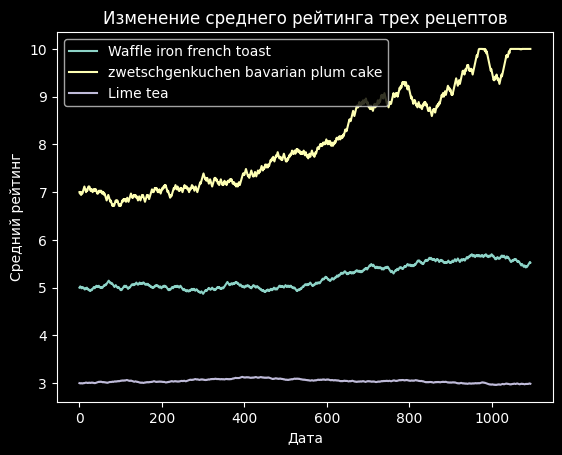

In [14]:
array = np.load(path/'average_ratings.npy')

graph = plt.subplot()

for i in range(3):
    graph.plot(array[i])

graph.set_title('Изменение среднего рейтинга трех рецептов')
graph.set_xlabel("Дата")
graph.set_ylabel("Средний рейтинг")

graph.legend(['Waffle iron french toast',
             'zwetschgenkuchen bavarian plum cake',
              'Lime tea'], loc="upper left")

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


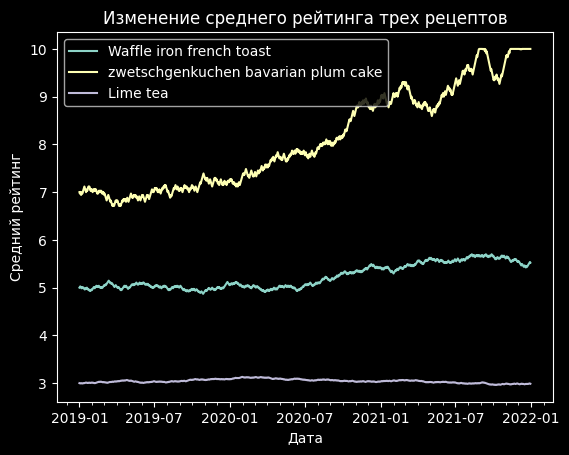

In [12]:
dates = pd.date_range(start="2019-01-01", end="2021-12-30")
graph = plt.subplot()

for i in range(3):
    graph.plot(dates, array[i])

graph.set_title('Изменение среднего рейтинга трех рецептов')
graph.set_xlabel("Дата")
graph.set_ylabel("Средний рейтинг")

graph.legend(['Waffle iron french toast',
             'zwetschgenkuchen bavarian plum cake',
              'Lime tea'], loc="upper left")

graph.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
graph.xaxis.set_minor_locator(mdates.MonthLocator())


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

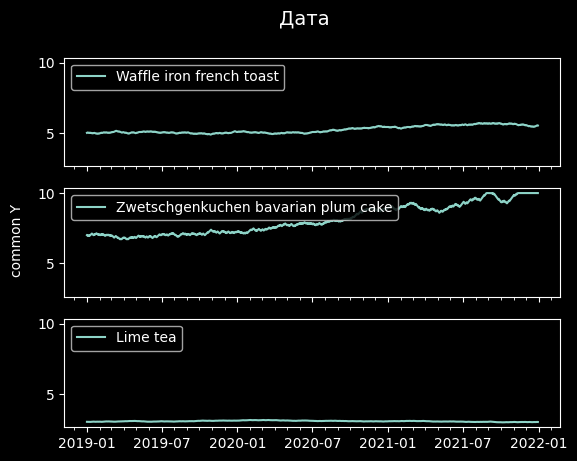

In [52]:
graph, axs = plt.subplots(3, sharex=True, sharey=True)
labels = ['Waffle iron french toast',
          'Zwetschgenkuchen bavarian plum cake', 'Lime tea']

for i in range(3):
    axs[i].plot(dates, array[i], label=labels[i])
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    axs[i].xaxis.set_minor_locator(mdates.MonthLocator())
    axs[i].legend(loc="upper left")

graph.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
graph.suptitle("Дата", fontsize=14)
None

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


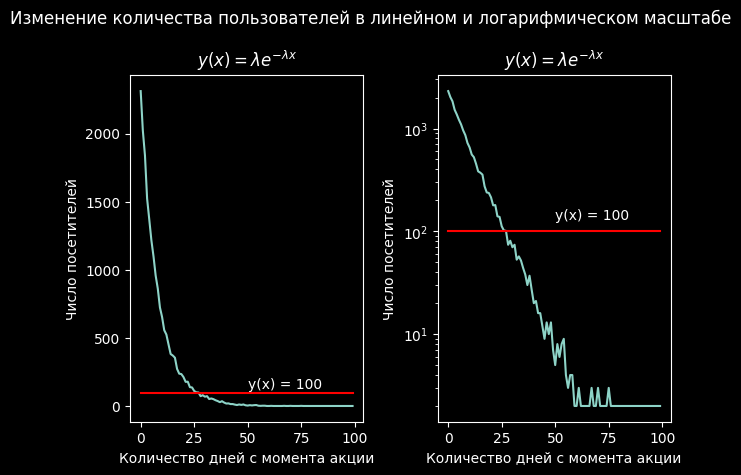

In [16]:
graph, axes = plt.subplots(1, 2)
axes[1].set_yscale('log')
sns.lineplot(np.load(path/"visitors.npy"), ax=axes[0])
sns.lineplot(np.load(path/"visitors.npy"), ax=axes[1])

for i in range(2):
    axes[i].plot([100]*100, 'r')
    axes[i].set_title("$y(x)=\lambda e^{-\lambda x}$")
    axes[i].set_xlabel('Количество дней с момента акции')
    axes[i].set_ylabel('Число посетителей')
    axes[i].text(50, 130, 'y(x) = 100')


graph.suptitle(
    'Изменение количества пользователей в линейном и логарифмическом масштабе')
graph.tight_layout()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [28]:
def dataparser(date):
    return datetime.strptime(date, "%Y-%m-%d")

reviews = pd.read_csv(path/'reviews_sample_5.csv',
                      date_parser=dataparser, parse_dates=['date'])
recipes = pd.read_csv(path/'recipes_sample_5.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [24]:
def groups_f(t):
    if t < 5:
        return 'short'
    if t > 50:
        return 'long'
    return 'mean'


recipes['longs'] = recipes['minutes'].apply(groups_f)
groups = recipes.groupby('longs')


Text(0.5, 1.0, 'Размеры групп рецептов')

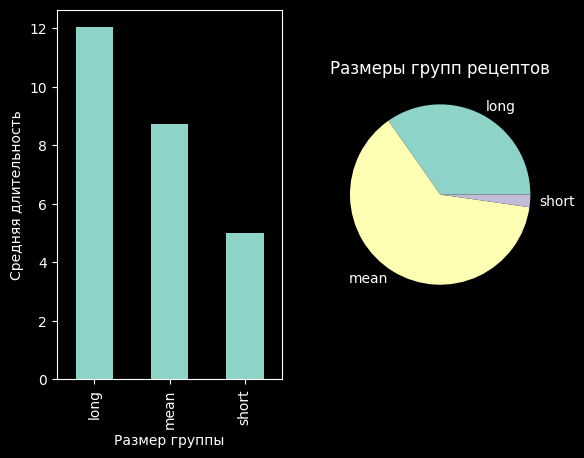

In [25]:
graph, (bar, pie) = plt.subplots(1, 2)

groups['n_steps'].mean().plot.bar(ax=bar)
bar.set_xlabel('Размер группы')
bar.set_ylabel('Средняя длительность')

groups.apply(len).plot.pie(ax=pie)
pie.set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

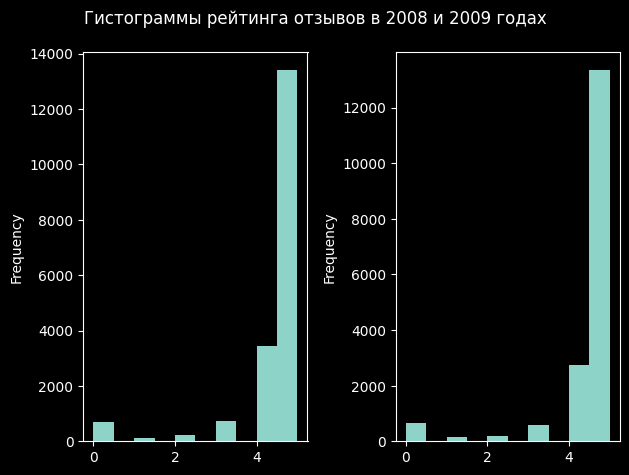

In [29]:
fig2, canvas2 = plt.subplots(1, 2)

reviews[reviews['date'].apply(lambda x: x.year == 2008)]['rating'].plot.hist(ax=canvas2[0])
reviews[reviews['date'].apply(lambda x: x.year == 2009)]['rating'].plot.hist(ax=canvas2[1])
fig2.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
fig2.tight_layout()

---
### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

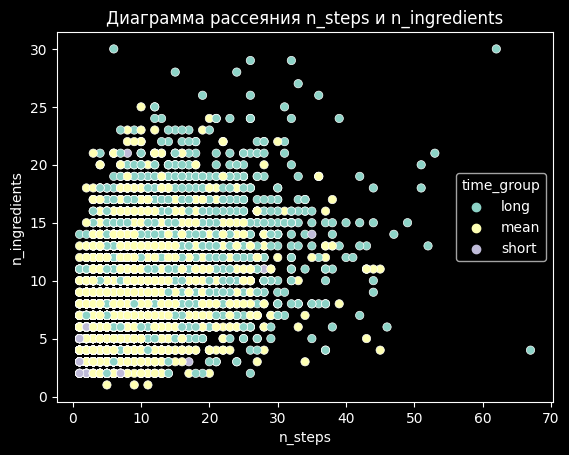

In [22]:
scatter = sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='longs')
scatter.set_title('Диаграмма рассеяния n_steps и n_ingredients')


Четкой зависимости не наблюдается

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

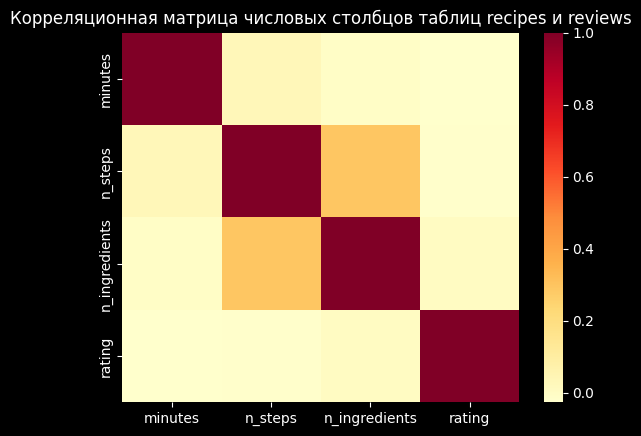

In [20]:
common = pd.merge(reviews, recipes, left_on='recipe_id', right_on='id')

dataset = common[["minutes", "n_steps", "n_ingredients", "rating"]].corr()

matrix = sns.heatmap(dataset, cmap='YlOrRd')

matrix.set_title(
    'Корреляционная матрица числовых столбцов таблиц recipes и reviews')
